In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("clean_data.csv")

In [3]:
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['si']=data['so2'].apply(calculate_si)
df= data[['so2','si']]
df.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [4]:
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['ni']=data['no2'].apply(calculate_ni)
df= data[['no2','ni']]
df.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [5]:
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
data['rpi']=data['rspm'].apply(calculate_si)
df= data[['rspm','rpi']]
df.tail()

,rspm,rpi
430340,148.0,122.666667
430341,131.0,117.000000
430342,140.0,120.000000
430343,143.0,121.000000
430344,171.0,130.333333


In [6]:
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
data['spi']=data['spm'].apply(calculate_spi)
df= data[['spm','spi']]
df.tail()
#many data values of rspm values is unawailable since it was not measure before

,spm,spi
430340,220.78348,180.52232
430341,220.78348,180.52232
430342,220.78348,180.52232
430343,220.78348,180.52232
430344,220.78348,180.52232


In [7]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
data['AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= data[['date','state','si','ni','rpi','spi','AQI']]
df.head()

,date,state,si,ni,rpi,spi,AQI
0,1990-02-01,Andhra Pradesh,6.000,21.750,109.610928,180.52232,180.52232
1,1990-02-01,Andhra Pradesh,3.875,8.750,109.610928,180.52232,180.52232
2,1990-02-01,Andhra Pradesh,7.750,35.625,109.610928,180.52232,180.52232
3,1990-03-01,Andhra Pradesh,7.875,18.375,109.610928,180.52232,180.52232
4,1990-03-01,Andhra Pradesh,5.875,9.375,109.610928,180.52232,180.52232


In [8]:
df=data[['AQI','date']]
df["date"] = pd.to_datetime(df['date'])
df.tail(20)

C:\Users\TNK\AppData\Local\Temp\ipykernel_6772\4064763646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df['date'])


,AQI,date
430325,180.52232,2015-10-23
430326,180.52232,2015-10-28
430327,180.52232,2015-10-31
430328,180.52232,2015-11-05
430329,180.52232,2015-11-07
430330,180.52232,2015-11-10
430331,180.52232,2015-11-11
430332,180.52232,2015-11-16
430333,180.52232,2015-11-20
430334,180.52232,2015-11-26


In [9]:
df=df.set_index('date').resample('M')["AQI"].mean()
df.head()

C:\Users\TNK\AppData\Local\Temp\ipykernel_6772\2822222202.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df=df.set_index('date').resample('M')["AQI"].mean()


date
1987-01-31    259.563812
1987-02-28    253.636467
1987-03-31    322.938366
1987-04-30    227.085685
1987-05-31    336.653480
Freq: ME, Name: AQI, dtype: float64

In [10]:
data=df.reset_index(level=0, inplace=False)
data = data[np.isfinite(data['AQI'])]
data=data[data.date != '1970-01-31']
data = data.reset_index(drop=True)
data.head()

,date,AQI
0,1987-01-31,259.563812
1,1987-02-28,253.636467
2,1987-03-31,322.938366
3,1987-04-30,227.085685
4,1987-05-31,336.653480


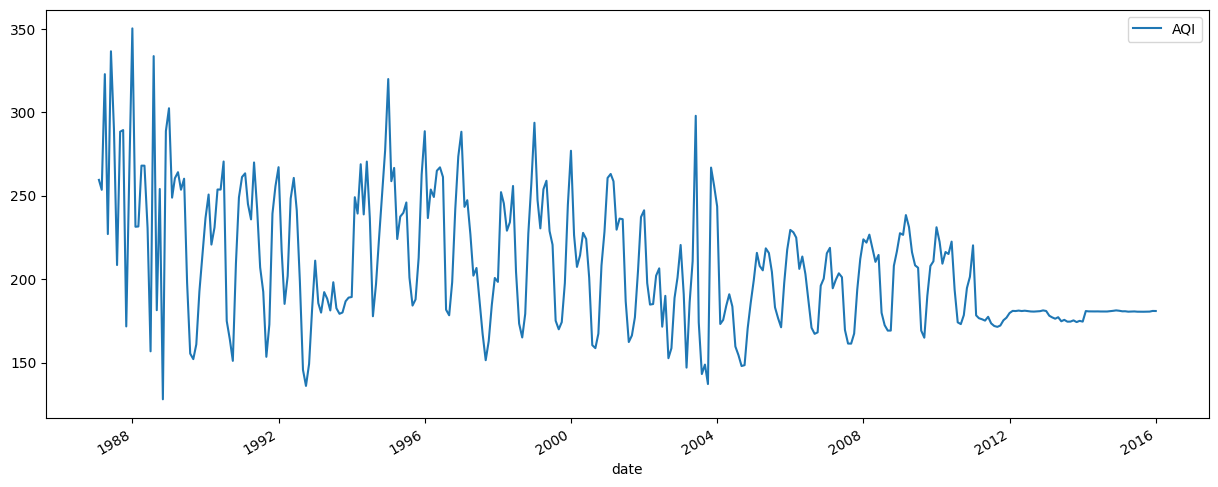

In [11]:
df=data.set_index('date')
df.sort_values(by='date',ascending=False)
df.plot(figsize=(15, 6))
plt.show()
y=df.AQI

In [12]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['AQI'])
print('ADF Statistic:', result[0])
print('p-value:', result[1]) 


ADF Statistic: -3.289800186608074
p-value: 0.015340608460801847


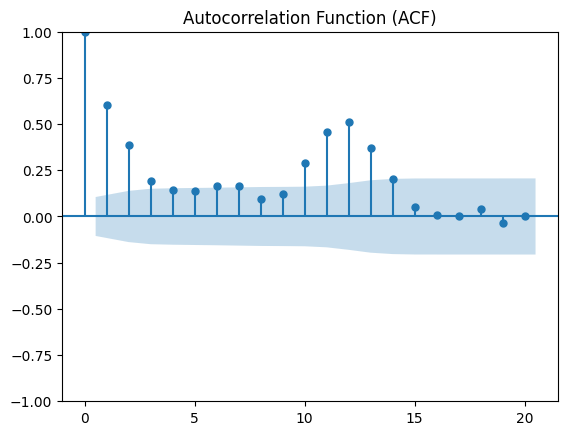

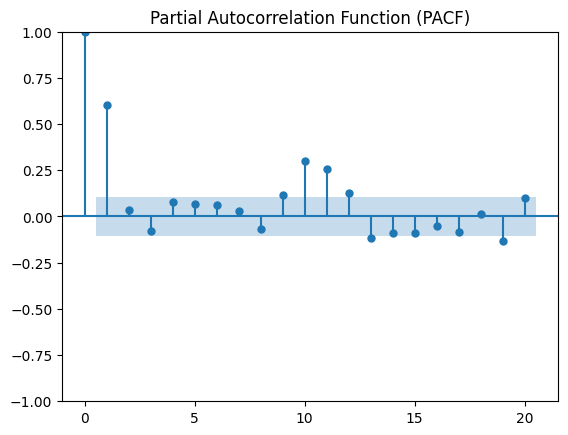

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plot_acf(df['AQI'], lags=20)
plt.title("Autocorrelation Function (ACF)")
plt.show()

# Plot PACF
plot_pacf(df['AQI'], lags=20)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

In [15]:
def find_best_arima(data, max_p=3, max_d=2, max_q=3):
    """
    Find the best (p, d, q) parameters for an ARIMA model based on AIC.
    
    Parameters:
        data (pd.Series): Time series data for the ARIMA model.
        max_p (int): Maximum value of p to test.
        max_d (int): Maximum value of d to test.
        max_q (int): Maximum value of q to test.
        
    Returns:
        dict: Dictionary containing the best parameters and their corresponding AIC value.
    """
    best_aic = float("inf")
    best_params = None
    
    # Check stationarity and determine d
    adf_test = adfuller(data)
    if adf_test[1] < 0.05:
        suggested_d = 0  # Data is already stationary
    else:
        suggested_d = 1  # Data needs differencing

    print(f"Suggested initial d (based on ADF test): {suggested_d}")
    
    # Iterate over all combinations of p, d, q
    for p, d, q in itertools.product(range(max_p + 1), range(max_d + 1), range(max_q + 1)):
        try:
            model = ARIMA(data, order=(p, d, q)).fit()
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_params = (p, d, q)
        except:
            continue

    return {"best_params": best_params, "best_aic": best_aic}

In [16]:
result = find_best_arima(df)
print(f"Best Parameters: {result['best_params']}")
print(f"Best AIC: {result['best_aic']}")

Suggested initial d (based on ADF test): 0


c:\Users\TNK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\TNK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\TNK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\TNK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, b

Best Parameters: (3, 1, 2)
Best AIC: 3335.96444118934


In [17]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['AQI'], order=(3, 0, 2))
fitted_model = model.fit()

# Summary of the model
print(fitted_model.summary())

c:\Users\TNK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\TNK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\TNK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                  346
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -1670.462
Date:                Sun, 24 Nov 2024   AIC                           3354.925
Time:                        12:04:44   BIC                           3381.850
Sample:                             0   HQIC                          3365.646
                                - 346                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        210.1374     28.897      7.272      0.000     153.500     266.775
ar.L1          0.5297      0.051     10.458      0.000       0.430       0.629
ar.L2          0.9704      0.036     27.225      0.0

c:\Users\TNK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TNK\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\TNK\AppData\Local\Temp\ipykernel_6772\2938102407.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='M')[1:], forecast, label="Forecast", color='red')


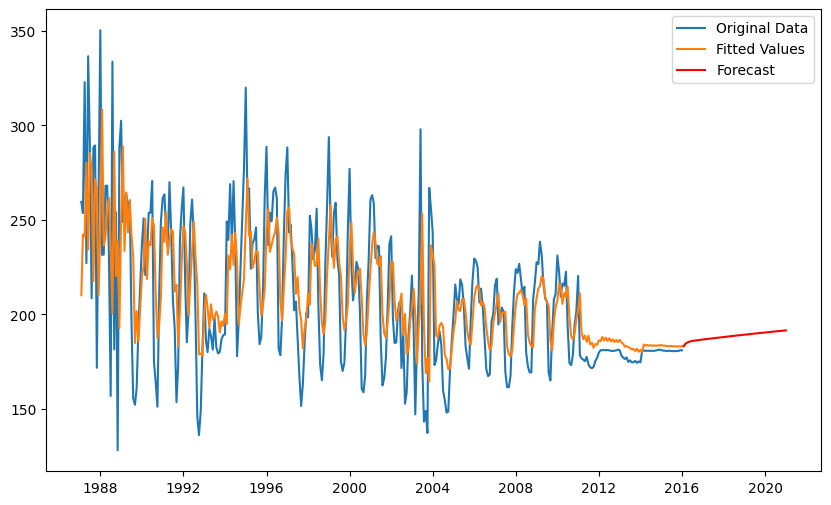

In [18]:
df['fitted'] = fitted_model.fittedvalues

# Out-of-sample prediction
forecast_steps = 60
forecast = fitted_model.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['AQI'], label="Original Data")
plt.plot(df['fitted'], label="Fitted Values")
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps + 1, freq='M')[1:], forecast, label="Forecast", color='red')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['AQI'][1:], df['fitted'][1:])
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}')

MSE: 918.5576115049712, RMSE: 30.307715379173192


In [20]:
df

,AQI,fitted
date,,
1987-01-31,259.563812,210.137431
1987-02-28,253.636467,242.303623
1987-03-31,322.938366,241.091966
1987-04-30,227.085685,280.276497
1987-05-31,336.653480,234.267348
...,...,...
2015-08-31,180.528217,183.160593
2015-09-30,180.563329,182.931308
2015-10-31,180.607299,183.122040
